In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

sns.set()

In [116]:
df = pd.read_csv('spambase.csv')
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,310,0,620,0,0,310,0,0,0,0,...,310,0,0,0,232,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,...,2000,0,0,0,0,0,353,0,0,0
4598,300,0,300,0,0,0,0,0,0,0,...,1200,0,0,102,718,0,0,0,0,0
4599,960,0,0,0,320,0,0,0,0,0,...,320,0,0,0,57,0,0,0,0,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   word_freq_make        4601 non-null   int64
 1   word_freq_address     4601 non-null   int64
 2   word_freq_all         4601 non-null   int64
 3   word_freq_3d          4601 non-null   int64
 4   word_freq_our         4601 non-null   int64
 5   word_freq_over        4601 non-null   int64
 6   word_freq_remove      4601 non-null   int64
 7   word_freq_internet    4601 non-null   int64
 8   word_freq_order       4601 non-null   int64
 9   word_freq_mail        4601 non-null   int64
 10  word_freq_receive     4601 non-null   int64
 11  word_freq_will        4601 non-null   int64
 12  word_freq_people      4601 non-null   int64
 13  word_freq_report      4601 non-null   int64
 14  word_freq_addresses   4601 non-null   int64
 15  word_freq_free        4601 non-null   int64
 16  word_f

In [118]:
# Cantidad de observaciones por cada clase
df['spam'].value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [119]:
# n palabras o simbolos mas frecuentes en correos SPAM y NO SPAM
n = 10
freq_words_spam = df[df['spam'] == 1].sum().sort_values(ascending=False)[:n]
freq_words_no_spam = df[df['spam'] == 0].sum().sort_values(ascending=False)[:n]

In [120]:
# Top 10 words in spam
freq_words_spam

word_freq_you         4105599
word_freq_your        2502597
word_freq_will         997100
word_freq_free         939790
word_freq_our          931799
char_freq_!            931352
word_freq_all          732080
word_freq_mail         635470
word_freq_email        578759
word_freq_business     521250
dtype: int64

In [121]:
# Top 10 words in no spam
freq_words_no_spam

word_freq_you        3541702
word_freq_george     3527559
word_freq_hp         2496576
word_freq_will       1495268
word_freq_your       1223098
word_freq_hpl        1204398
word_freq_re         1159138
word_freq_edu         800669
word_freq_address     681569
word_freq_meeting     604460
dtype: int64

In [122]:
# Palabras compartidas en correos SPAM y NO SPAM (top 10)
shared_words = [word for word in freq_words_no_spam.index if word in freq_words_spam.index]
shared_words

['word_freq_you', 'word_freq_will', 'word_freq_your']

In [123]:
# Palabras en correos SPAM que no estan en top10 de correos NO SPAM
[word for word in freq_words_spam.index if word not in freq_words_no_spam.index]

['word_freq_free',
 'word_freq_our',
 'char_freq_!',
 'word_freq_all',
 'word_freq_mail',
 'word_freq_email',
 'word_freq_business']

Se puede ver que los correos spam suelen tener palabras pensadas para sugestionar al lector, como "gratis", "todo", o incluso el uso del signo de exclamación, con la intención de generar alguna emoción y empujar a la persona a actuar impulsivamente. También aparecen términos como "mail", "email", "negocio", que son palabras típicas en este tipo de mensajes porque apuntan directamente al canal de contacto o a algún tipo de propuesta comercial.

Por último se encuentran palabras comunes con los correos NO SPAM que son más genéricas, como "tu", "tus", "will" y "george" (que es probable que sea el nombre de la universidad de dónde se obtuvo el dataset) 

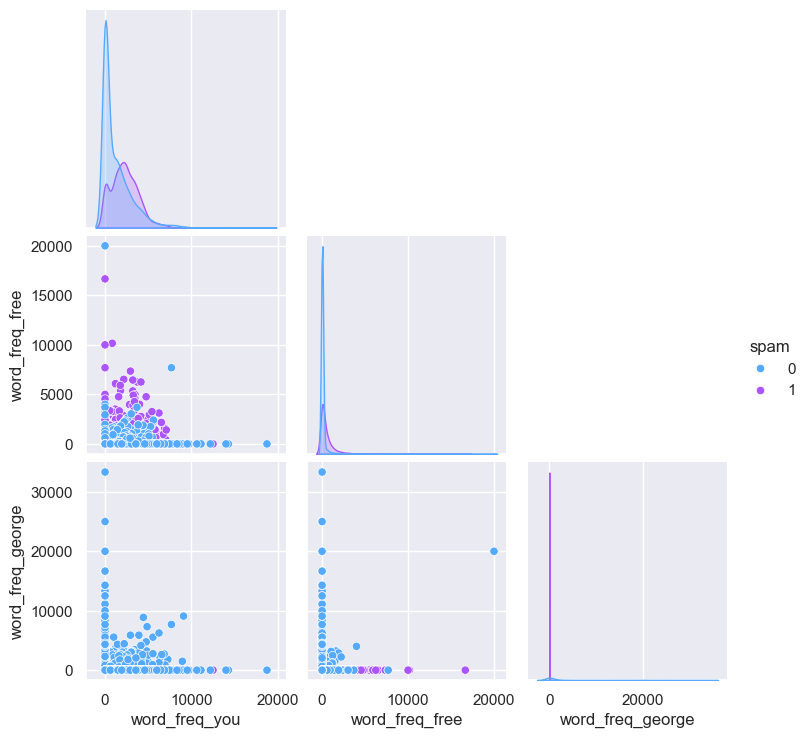

In [124]:
col_sel = ["word_freq_you", "word_freq_free", "word_freq_george", "spam"]
dataset_visualization = df[col_sel]

sns.pairplot(data=dataset_visualization, diag_kind="kde", hue="spam", palette="cool", corner=True);

In [125]:
# Separamos el conjunto de datos en entrenamiento (70%) y prueba (30%)
X, y = df.drop('spam', axis=1).to_numpy(), df['spam'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3220, 54), (3220,), (1381, 54), (1381,))

# Naive Bayes Model

In [126]:
# Entrenamos el modelo
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [127]:
y_pred_nb = naive_bayes_model.predict(X_test)

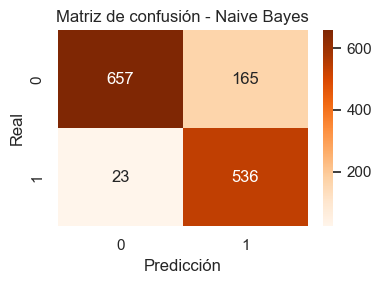

In [128]:
# Calculamos la matriz de confusion
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_nb, cmap='Oranges', annot=True, fmt='g')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Naive Bayes")
plt.tight_layout()
plt.show()

El modelo de naive bayes está cometiendo más errores de tipo 1 (falsos positivos) por encima de errores de tipo 2 (falsos negativos). Nótese que en este caso los errores del tipo 1 (falsos positivos) son más graves, porque involucra enviar un mail que NO era spam a la bandeja de spam, y por consiguiente, correr riesgo de no ser visto. Por otro lado, si se envía un correo spam a la bandeja de entrada, el único riesgo es que el usuario caiga en algún tipo de estafa, siendo menos probable debido al raciocinio humano involucrado.

In [129]:
# Metricas
summary_nb = classification_report(y_test, y_pred_nb, target_names=['Negativo', 'Positivo'])
print(summary_nb)

              precision    recall  f1-score   support

    Negativo       0.97      0.80      0.87       822
    Positivo       0.76      0.96      0.85       559

    accuracy                           0.86      1381
   macro avg       0.87      0.88      0.86      1381
weighted avg       0.88      0.86      0.87      1381



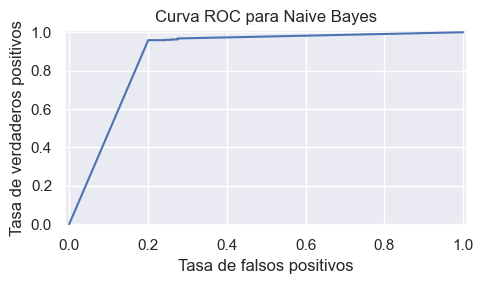

In [130]:
p_pred_nb = naive_bayes_model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, p_pred_nb[:, 1])

plt.figure(figsize=(5, 3))
plt.title("Curva ROC para Naive Bayes")
plt.plot(fpr, tpr)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.tight_layout()

In [131]:
# Area under the curve value for NB
roc_auc_score(y_test, p_pred_nb[:, 1])

0.880782941383858

# Logistic Regression Model

In [132]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_normalized, y_train)

LogisticRegression()

In [133]:
X_test_normalized = scaler.transform(X_test)

y_pred_lr = logistic_regression_model.predict(X_test_normalized)

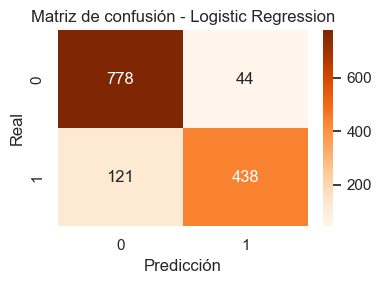

In [134]:
# Calculamos la matriz de confusion
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_lr, cmap='Oranges', annot=True, fmt='g')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Logistic Regression")
plt.tight_layout()
plt.show()

El modelo de regresión logística está cometiendo más errores de tipo 2 (falsos negativos) por encima de errores de tipo 1 (falsos positivos)

In [135]:
# Metricas
summary_lr = classification_report(y_test, y_pred_lr, target_names=['Negativo', 'Positivo'])
print(summary_lr)

              precision    recall  f1-score   support

    Negativo       0.87      0.95      0.90       822
    Positivo       0.91      0.78      0.84       559

    accuracy                           0.88      1381
   macro avg       0.89      0.87      0.87      1381
weighted avg       0.88      0.88      0.88      1381



En cuanto a la métrica de precision el modelo regresor logístico tiene mejores métricas que el modelo bayesiano, mientras que para el recall esto se invierte, obteniendo mejores métricas el modelo bayesiano. Esto está directamente relacionado a la mayor cantidad de error de tipo 1 y 2 que comete cada modelo, ya que son los parámetros involucrados en el cálculo de estas métricas.

Recordemos que:
$$
Precision = \frac{Verdadero Positivo}{Verdadero Positivo + Falso Positivo} \qquad Recall = \frac{Verdadero Positivo}{Verdadero Positivo + Falso Negativo}
$$

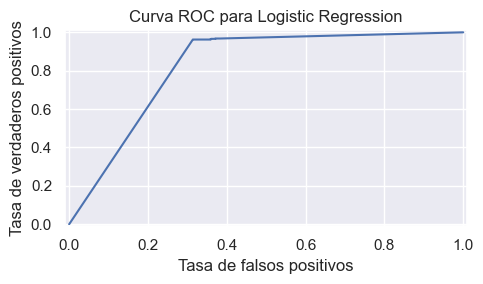

In [136]:
p_pred_lr = logistic_regression_model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, p_pred_lr[:, 1])

plt.figure(figsize=(5, 3))
plt.title("Curva ROC para Logistic Regression")
plt.plot(fpr, tpr)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.tight_layout()

In [137]:
# Area under the curve value for LR
roc_auc_score(y_test, p_pred_lr[:, 1])

0.8247413481669127